# ch07-3 신경망 모델 훈련

## 1. 손실 곡선

In [7]:
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

2025-11-19 11:27:04.795031: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-19 11:27:05.214895: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763519225.375653   24781 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763519225.421797   24781 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-19 11:27:05.758810: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [8]:
def model_fn(a_layer=None) :
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28,28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [9]:
model = model_fn()
model.summary()

I0000 00:00:1763519237.648705   24781 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1754 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 4GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

I0000 00:00:1763519240.325175   24983 service.cc:148] XLA service 0x7cbe98006220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763519240.325738   24983 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 4GB Laptop GPU, Compute Capability 8.6
2025-11-19 11:27:20.369682: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1763519240.486613   24983 cuda_dnn.cc:529] Loaded cuDNN version 91501
I0000 00:00:1763519241.793501   24983 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


`verbose` 매개변수는 훈련 과정 출력을 조절함.  
기본값은 1로 이전 절에서처럼 에포크마다 진행 막대외 함께 손실 등 지표가 나옴        
2로 바꾸면 진행 막대를 빼고 출력        
이번 절에는 0으로 지정하여 훈련 과정 생략 


In [11]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


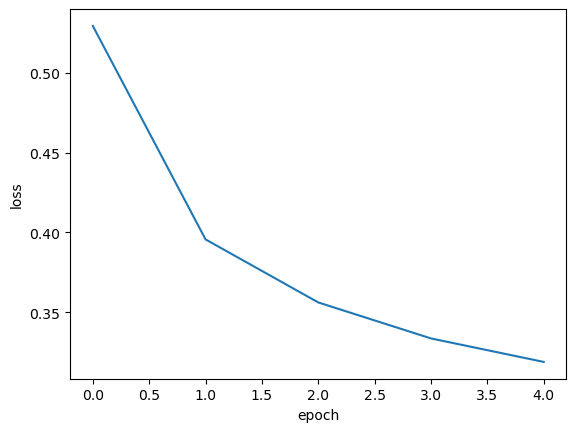

In [12]:
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

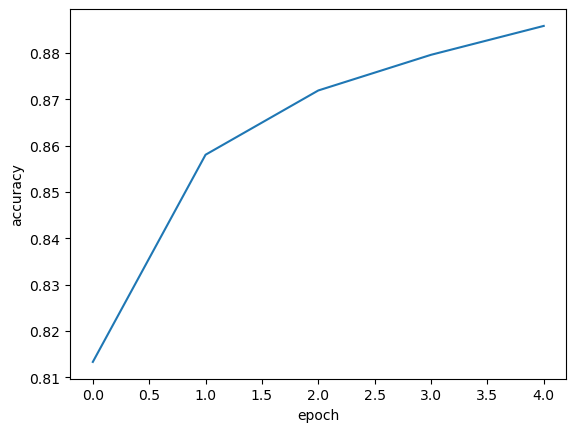

In [13]:
#정확도 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

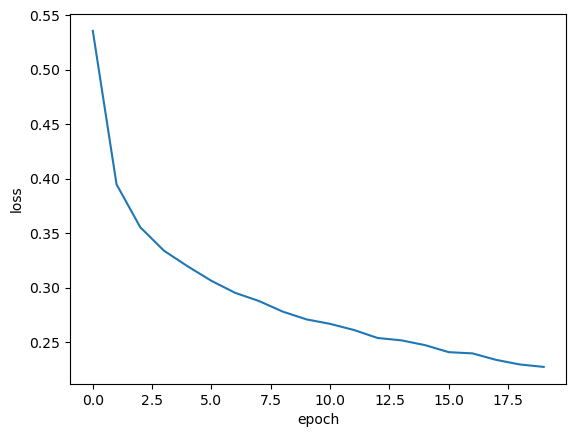

In [14]:
#epoch 수 20으로 늘려서 손실 그래프 그려보기
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 2.검증 손실

에포크에 따른 과대적합과 과소적합을 파악하기 위해 훈련 세트에 대한 점수 + 검증 세트에 대한 점수 필요        
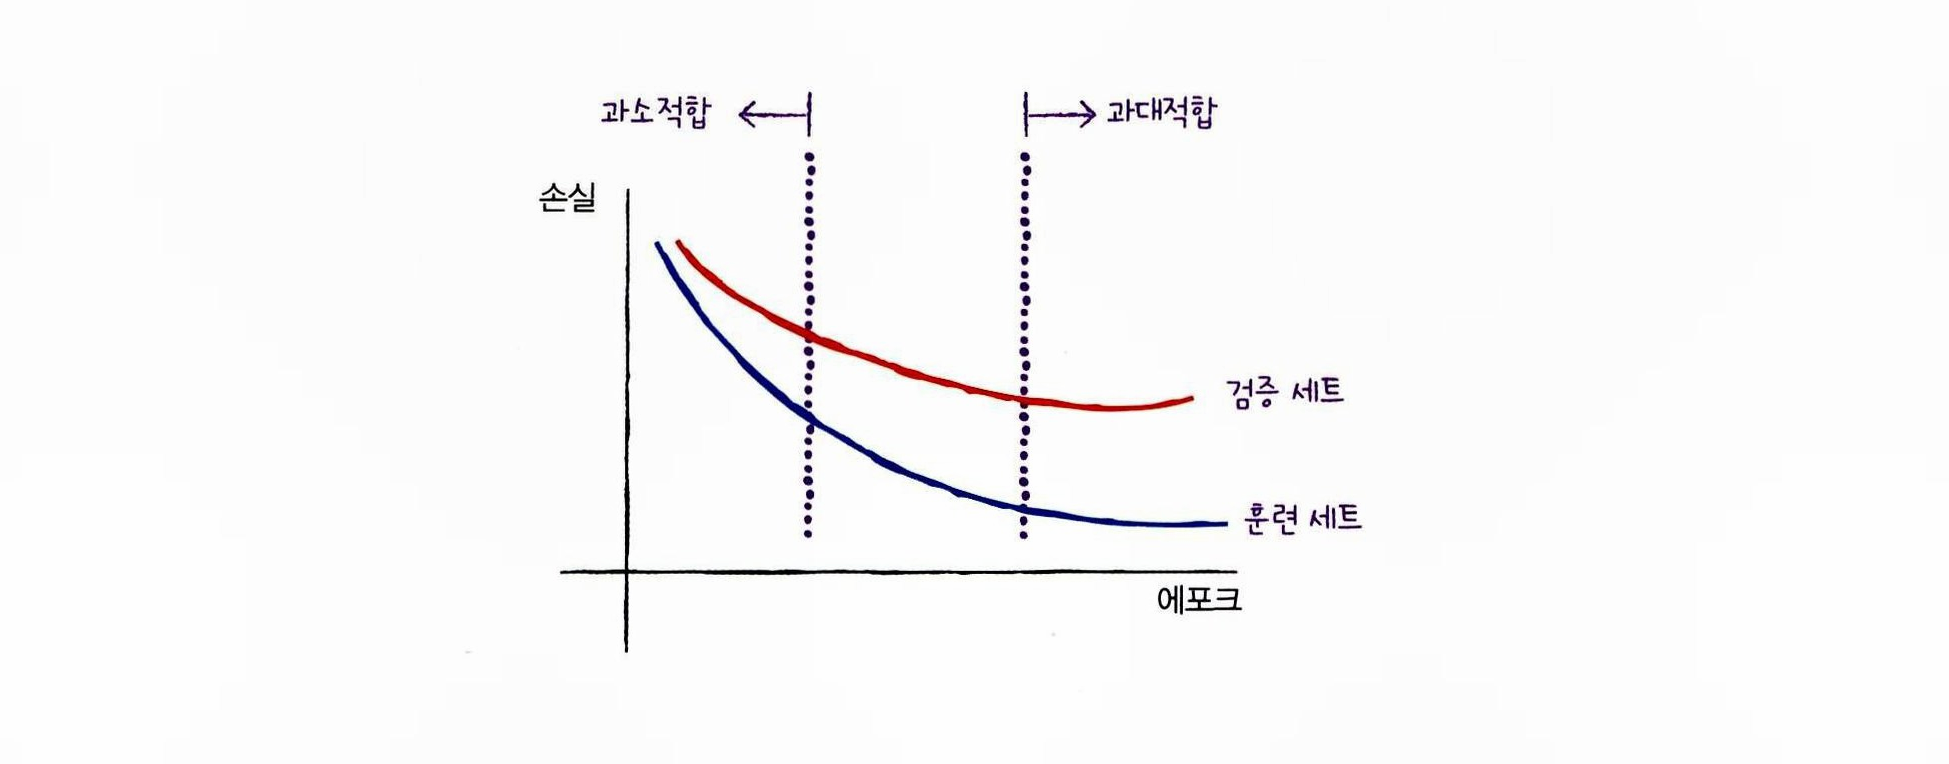

In [15]:
#에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터를 전달
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data =(val_scaled, val_target))

In [16]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


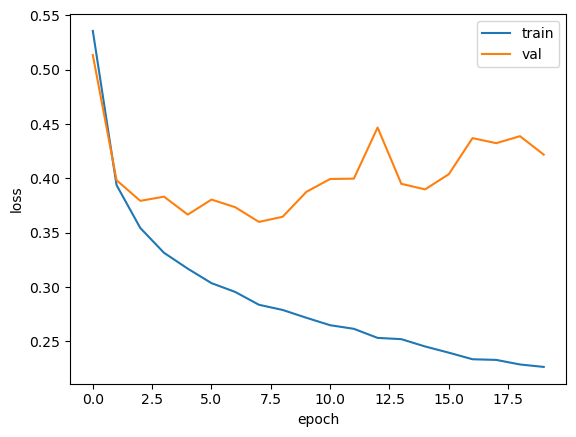

In [17]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

1. 처음에는 검증 손실(val loss)이 줄어든다 = 모델이 잘 배우고 있따         
- train loss(훈련 손실) : 계속 감소     
- val loss(검증 손실) : 초반에는 감소       

2. 어느 순간 (5번째 epoch?) 부터 val loss가 증가하기 시작 = 과대적합 시작       
- 모델이 훈련 데이터에만 너무 맞춰서 외워버리고, 새로운 데이터에서는 오히려 성능이 떨어지기 시작했다는 뜻       

3. 훈련 손실은 계속 감소 = 과대적합의 전형적인 모습 
- train loss 는 계속 내려간다       

4. 따라서, 검증 손실이 올라가는 시점을 기준으로 학습을 멈추는게 좋다.       
val loss가 증가하기 시작하는 바로 그 지점을 찾으라는 뜻     
그 지점에서 멈추면:     

✔ 과대적합을 방지      
✔ 검증 세트에서의 손실 감소        
✔ 검증 세트에서의 정확도 증가      

즉, 여기서 멈추는 게 가장 좋은 모델 상태가 된다는 뜻        
이게 바로 Early Stopping(조기 종료) 아이디어        


### 옵티마이저 하이퍼파라미터 조정으로 과대적합 완화 가능할까?

RMSprop 옵티마이저는 많은 문제에서 잘 작동      
아니면 Adam 사용        
- Adam은 적응적 학습률을 사용하므로 에포크가 진행되면서 학습률의 크기를 조정할 수 있다.     

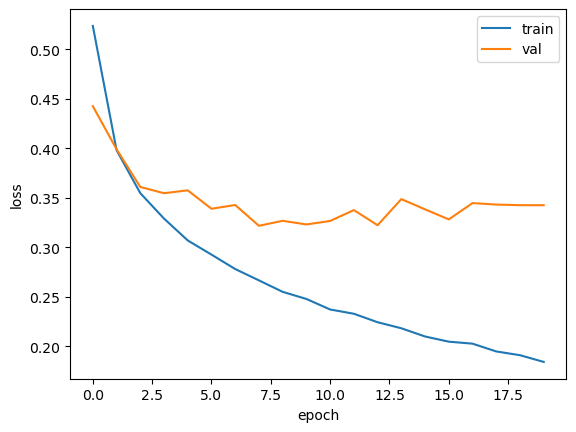

In [18]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## 3. 드롭 아웃 Dropout

훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (즉 뉴런의 출력을 0으로 만들어서) 과대적합을 막는다.
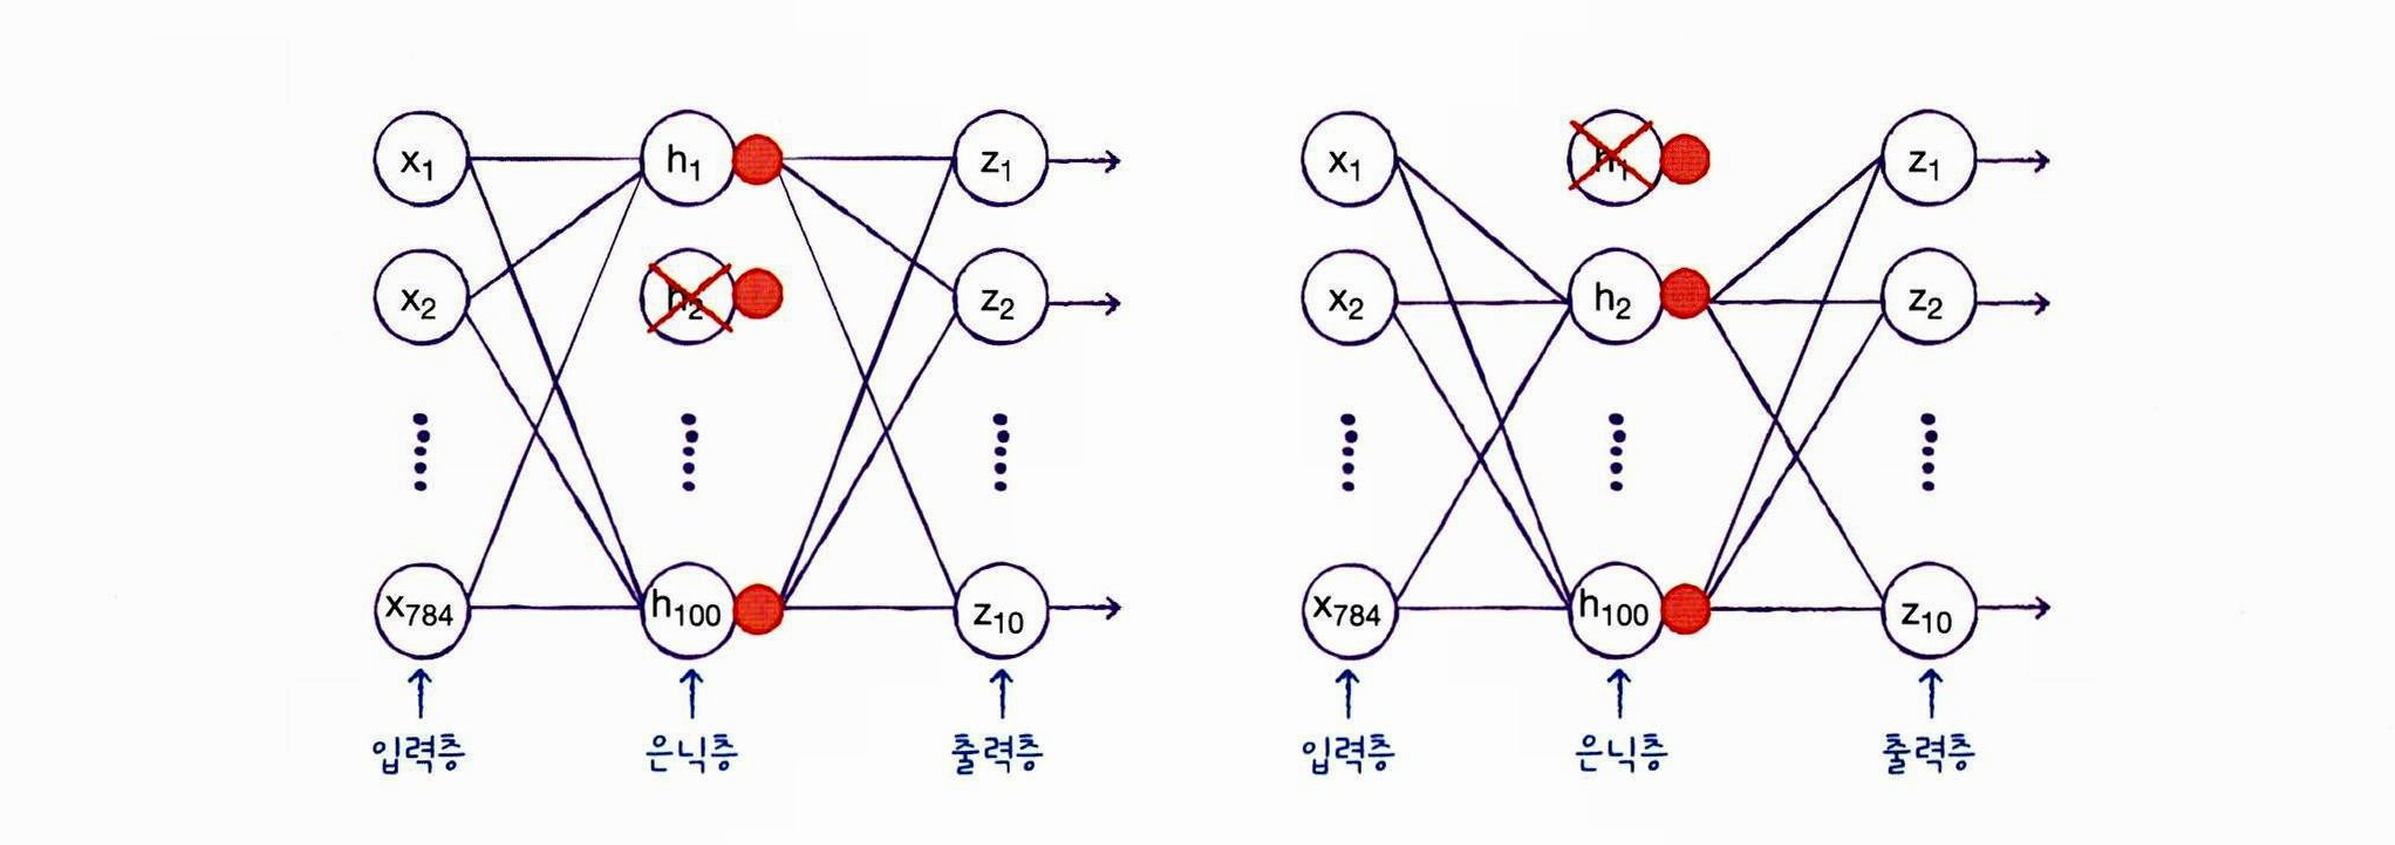

- 얼마나 많은 뉴런을 드롭할지는 우리가 정해야하는 하이퍼파라미터        

***드롭아웃이 왜 과대적합을 막을까?***      
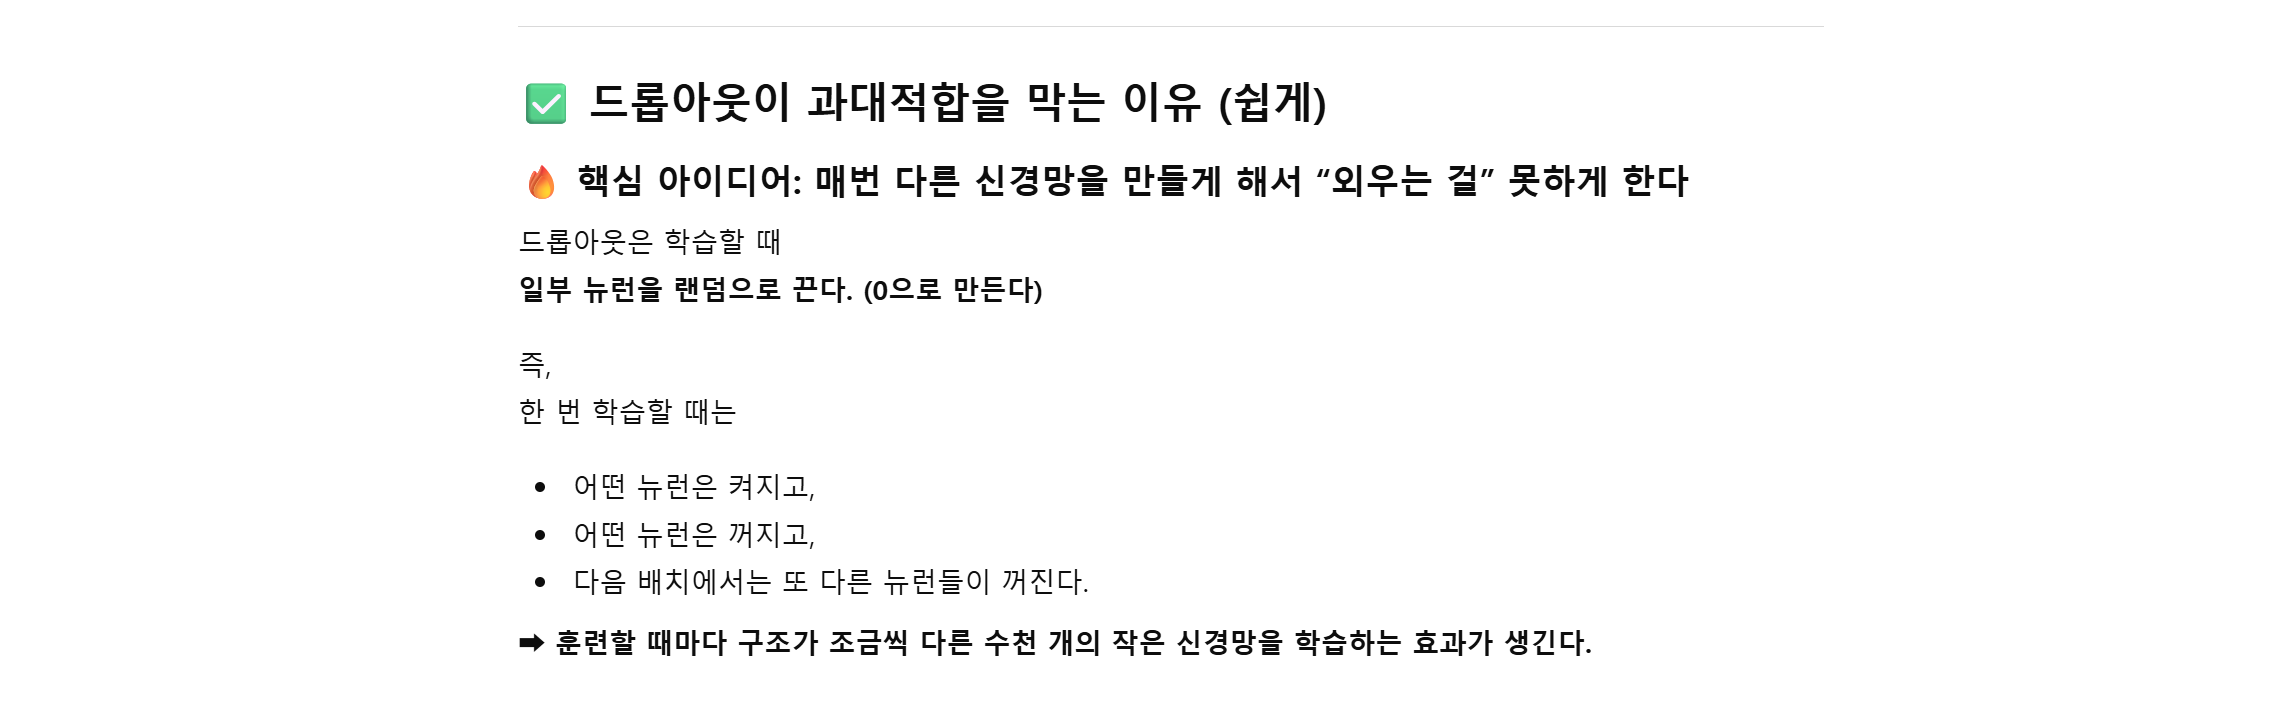
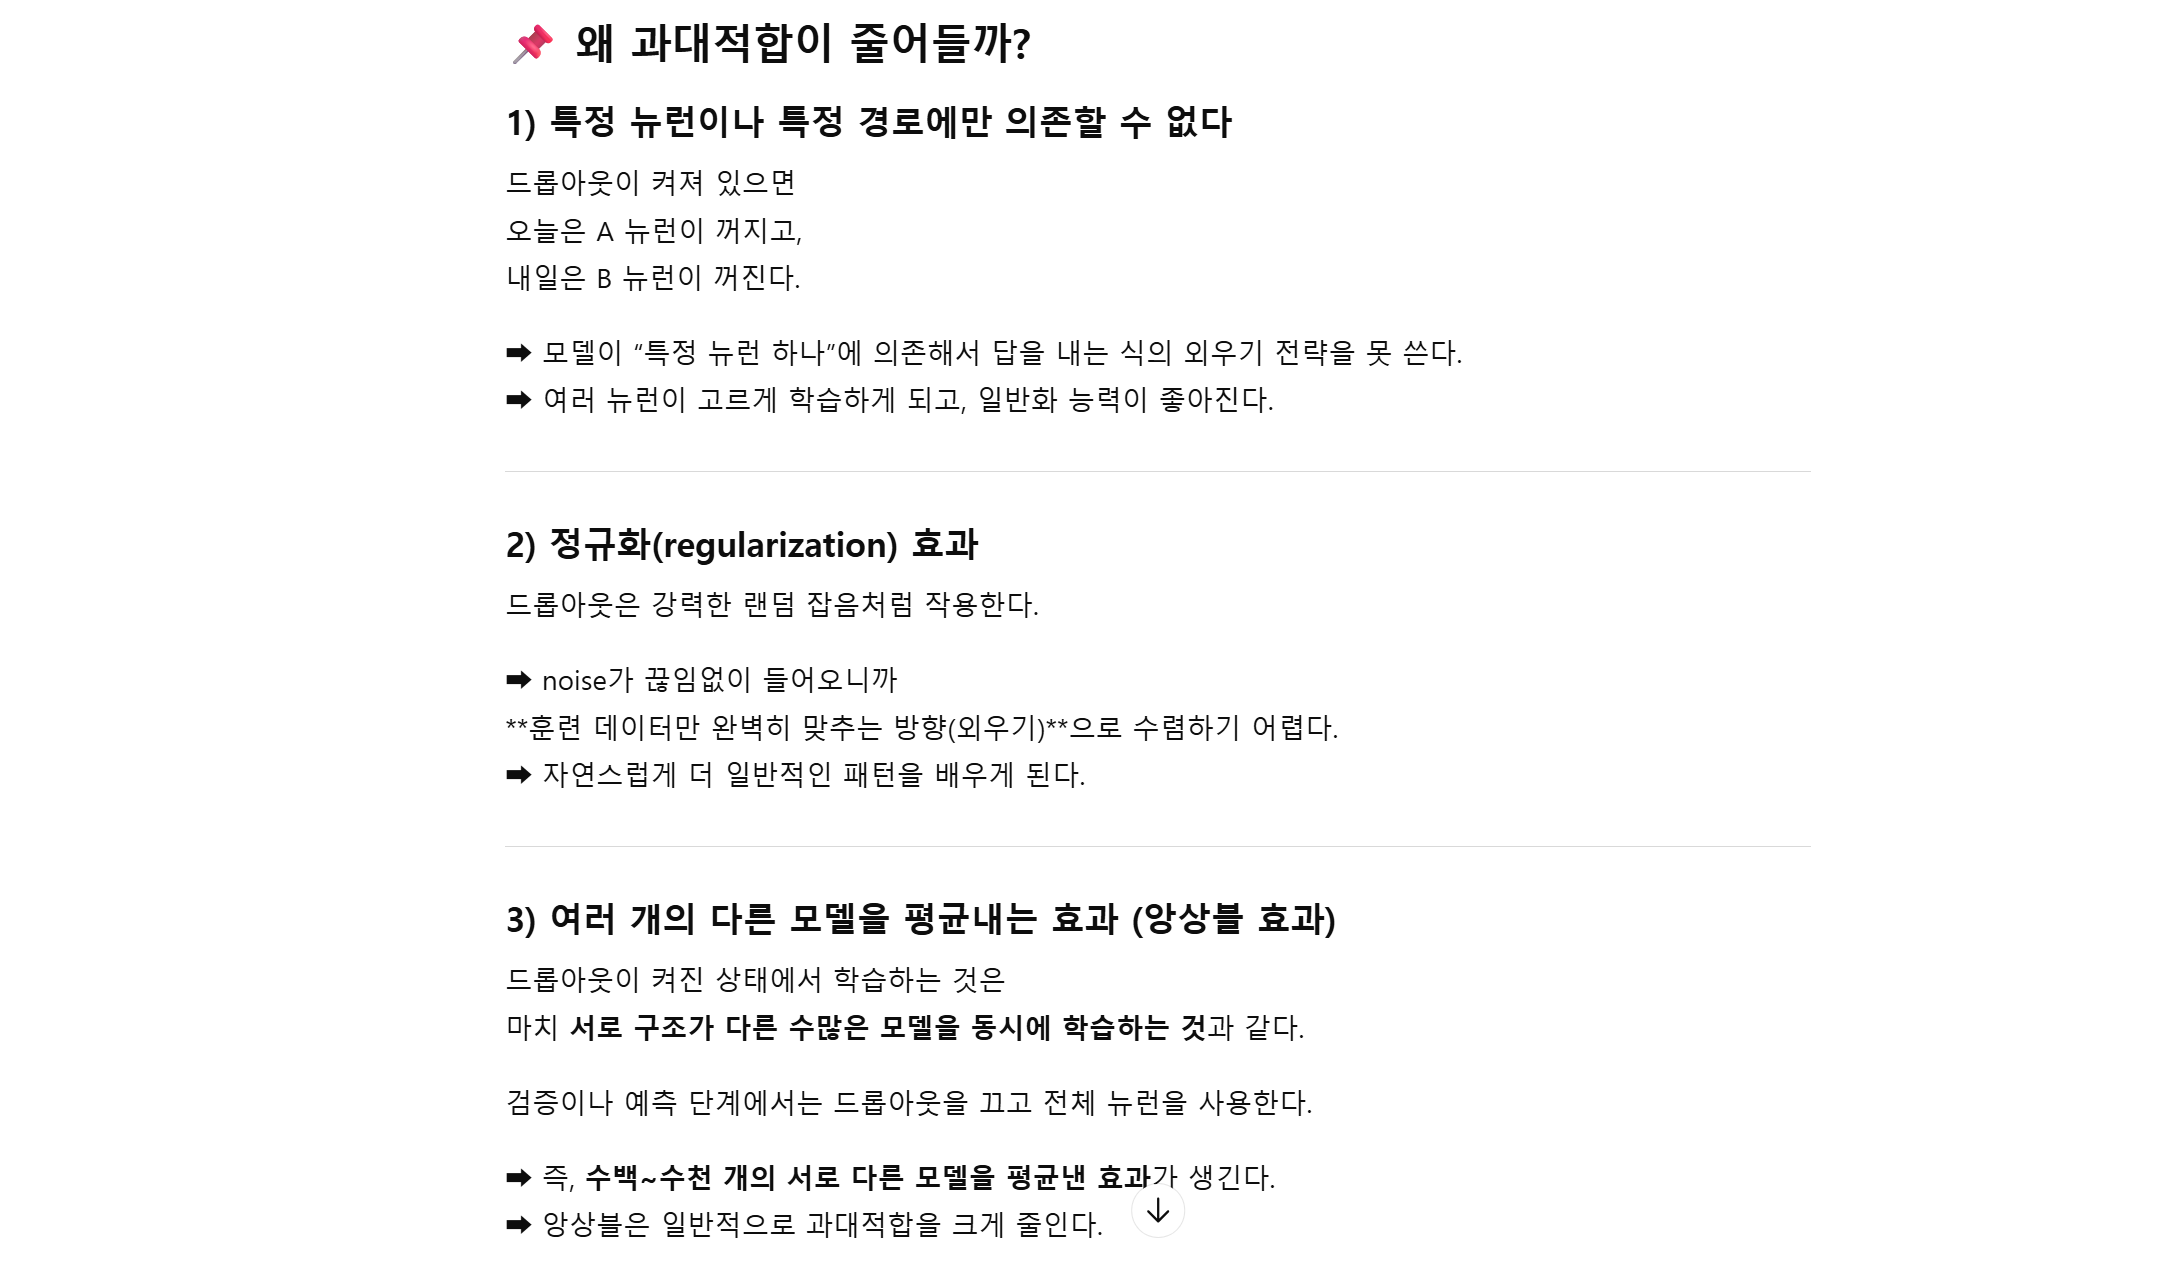
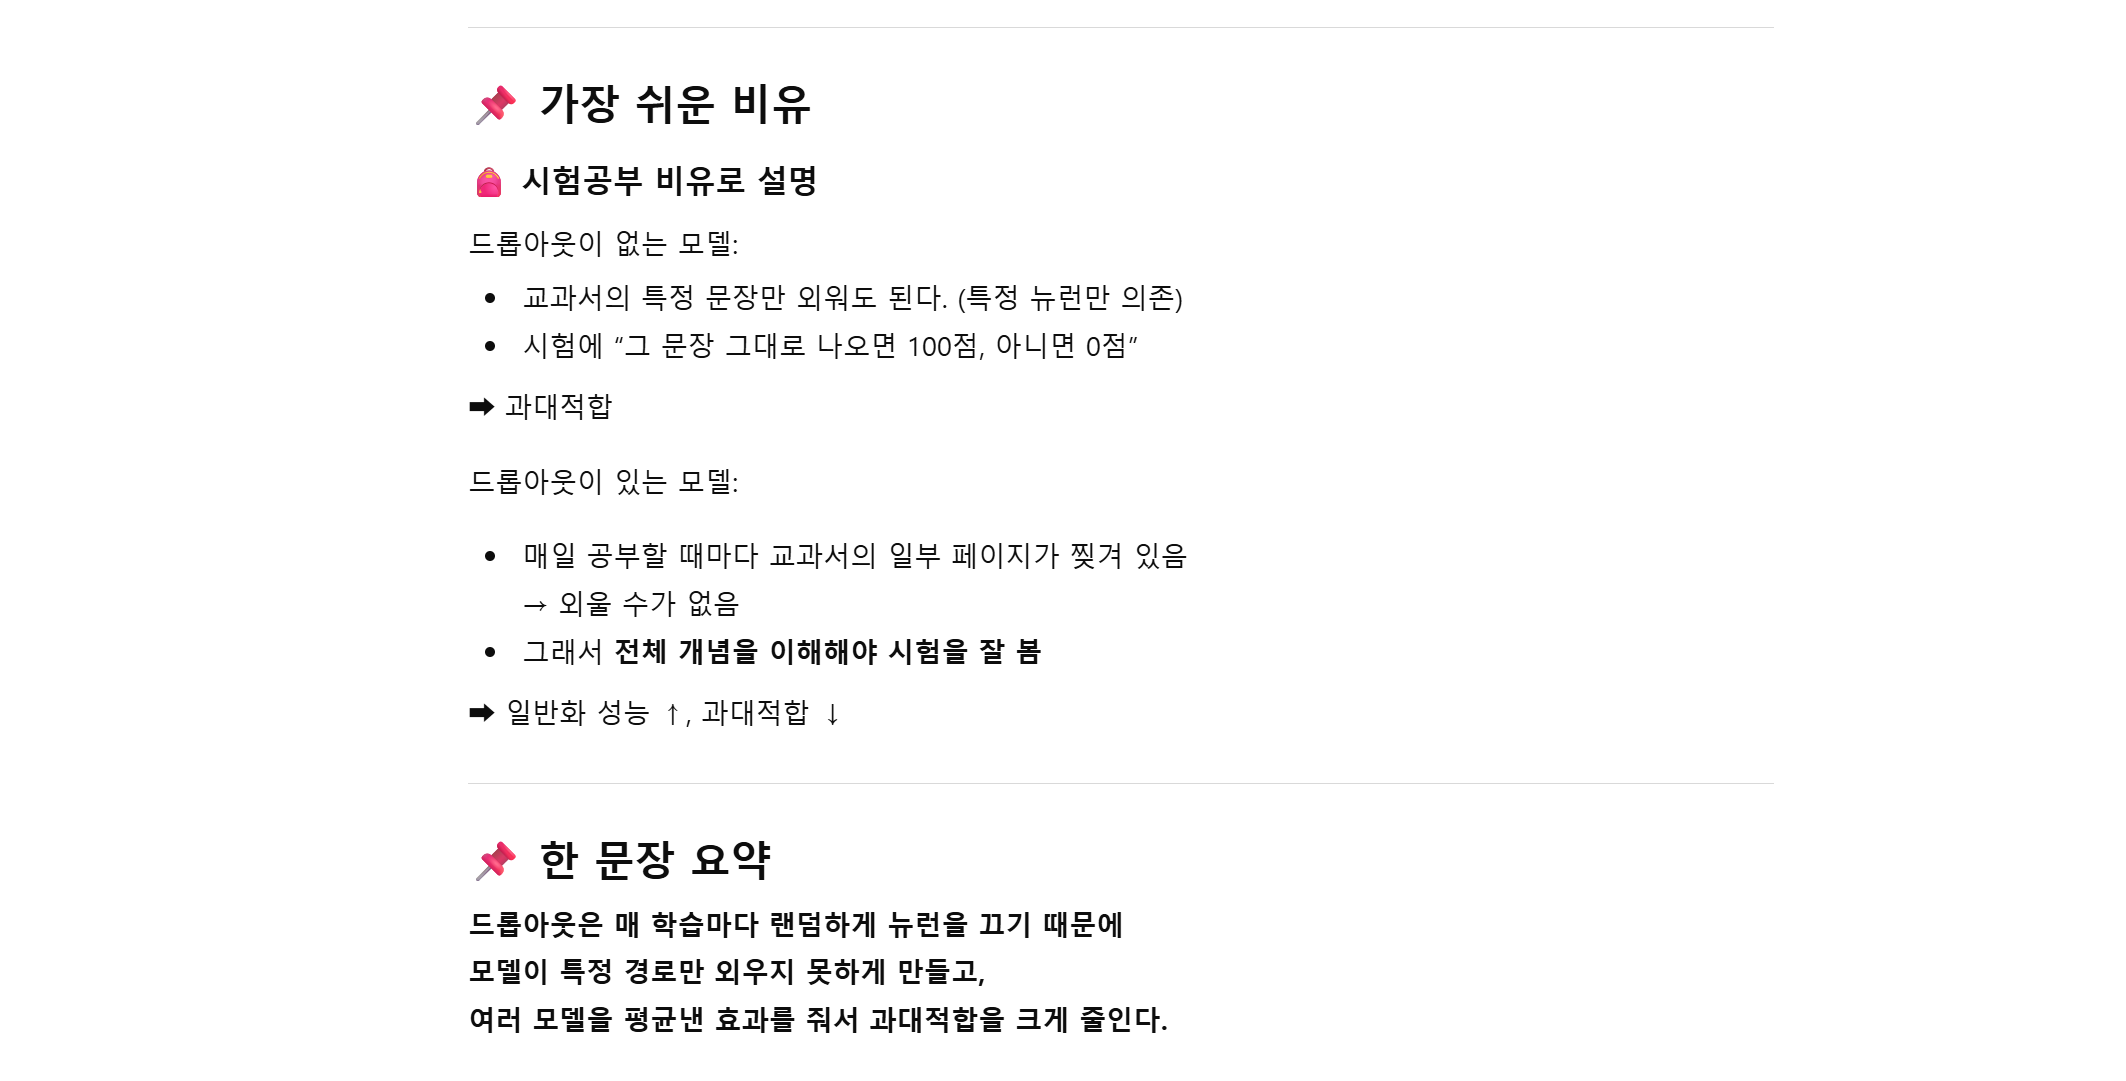

In [19]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

dropout 층은 훈련되는 모델 파라미터가 없고, 입력/출력 크기가 같음   
그러나, 훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않아야 한다.     
-> keras는 모델을 평가/예측할 때는 자동으로 드롭아웃층을 적용하지 않음      


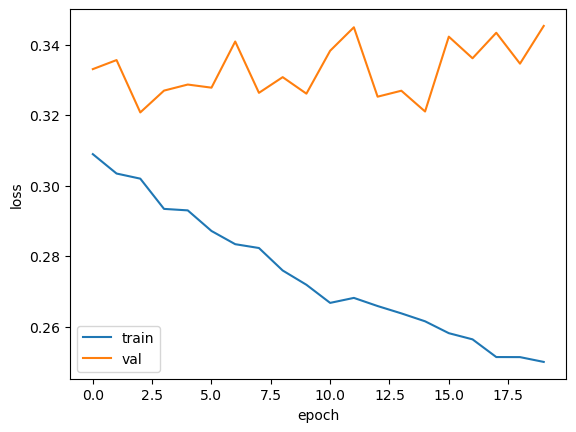

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## 3. 모델 저장과 복원

에포크 횟수를 11로 지정하고 다시 모델 훈련      
나중에 사용하려면 이 모델을 저장해야한다.       


In [22]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=11, verbose=0, validation_data=(val_scaled, val_target))

In [24]:
#모델 저장하기 - 모델 구조와 파라미터를 함께 저장 (확장자 .keras)
model.save('model-whole.keras')

In [25]:
#모델 저장하기 - 훈련된 모델의 파라미터만 저장 (확장자 .weights.h5)
model.save_weights('model.weights.h5')

In [26]:
#잘 만들어졌는지 확인
!ls -al model*

-rw-r--r-- 1 hykim hykim 979390 Nov 19 11:49 model-whole.keras
-rw-r--r-- 1 hykim hykim 976600 Nov 19 11:49 model.weights.h5


실험 1. 훈련을 하지 않은 새로운 모델을 만들고 `model-weights.h5` 파일에서 훈련된 모델 파라미터를 읽어서 사용        

실험 2. `model-whoe.keras` 파일에서 새로운 모델을 만들어 바로 사용 

In [28]:
# 실험 1
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

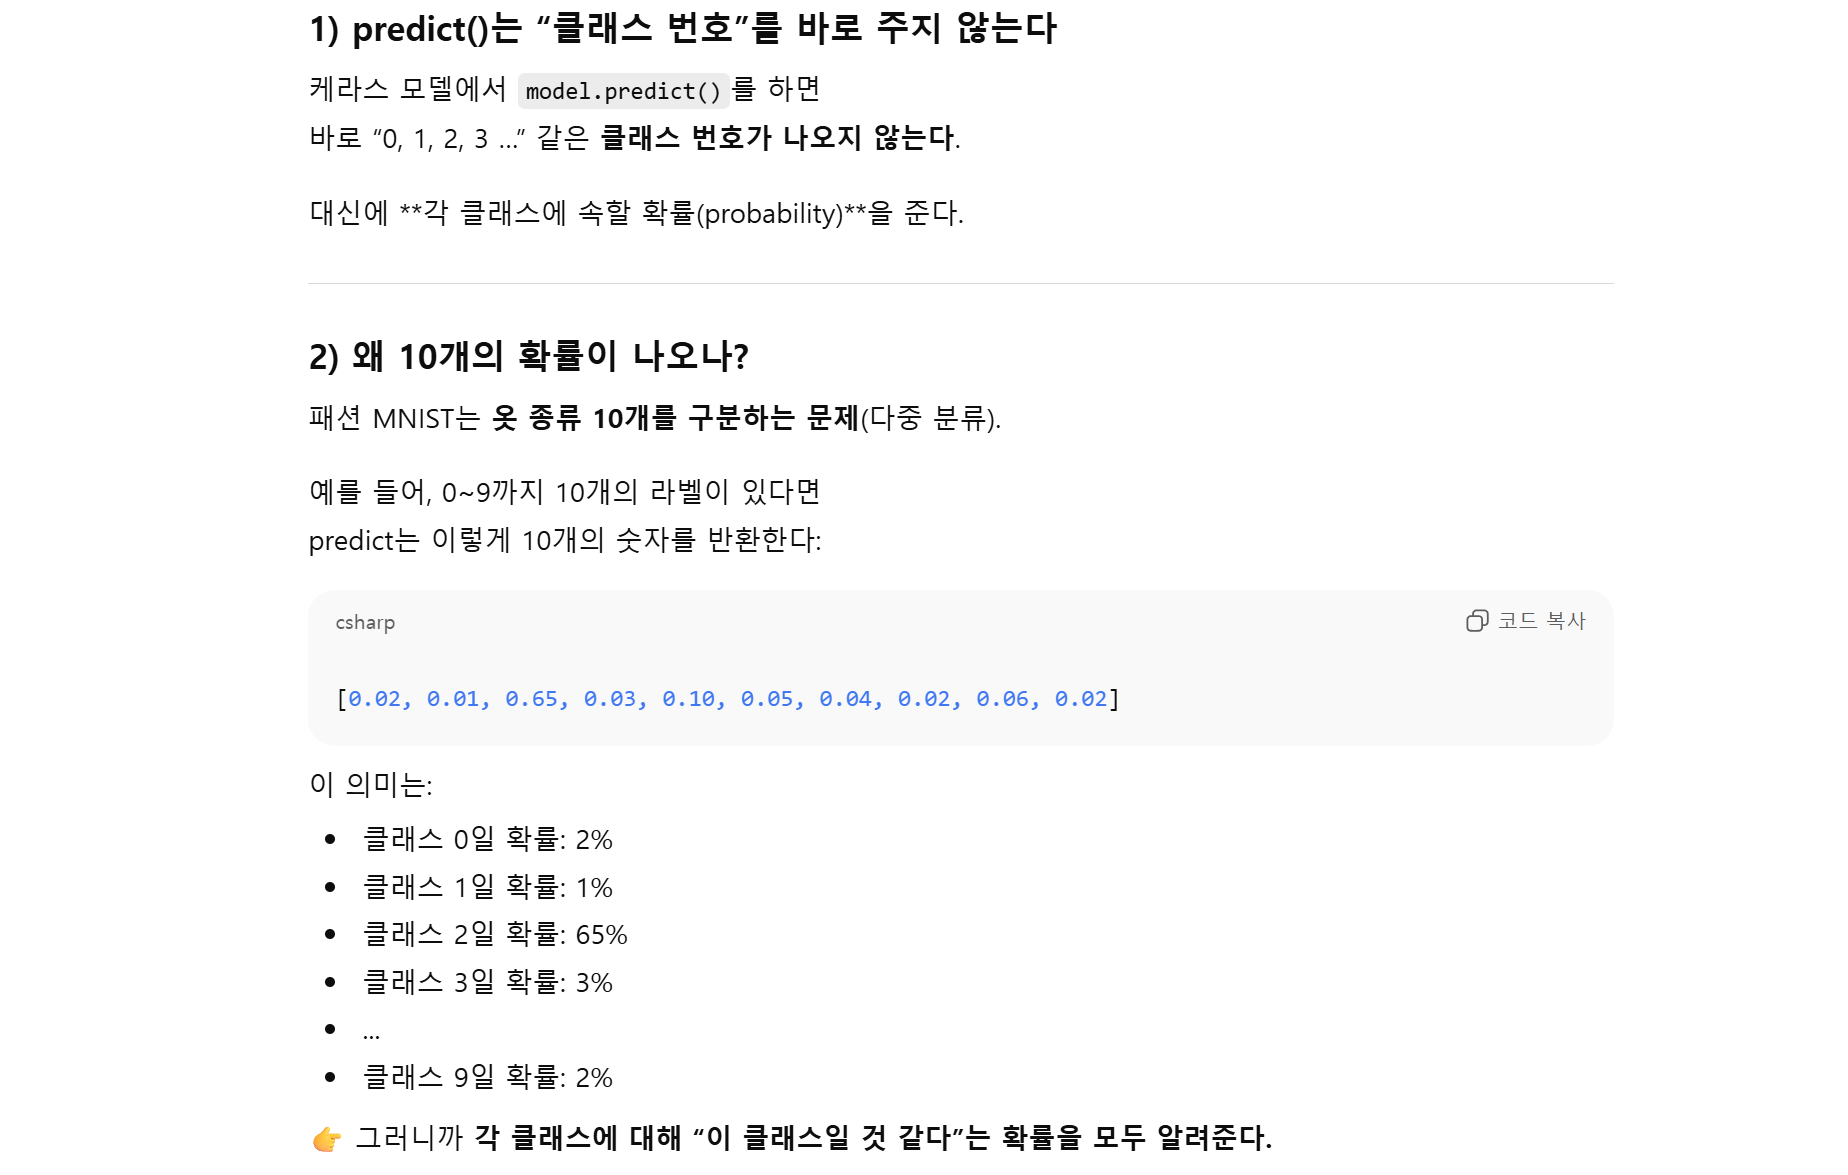
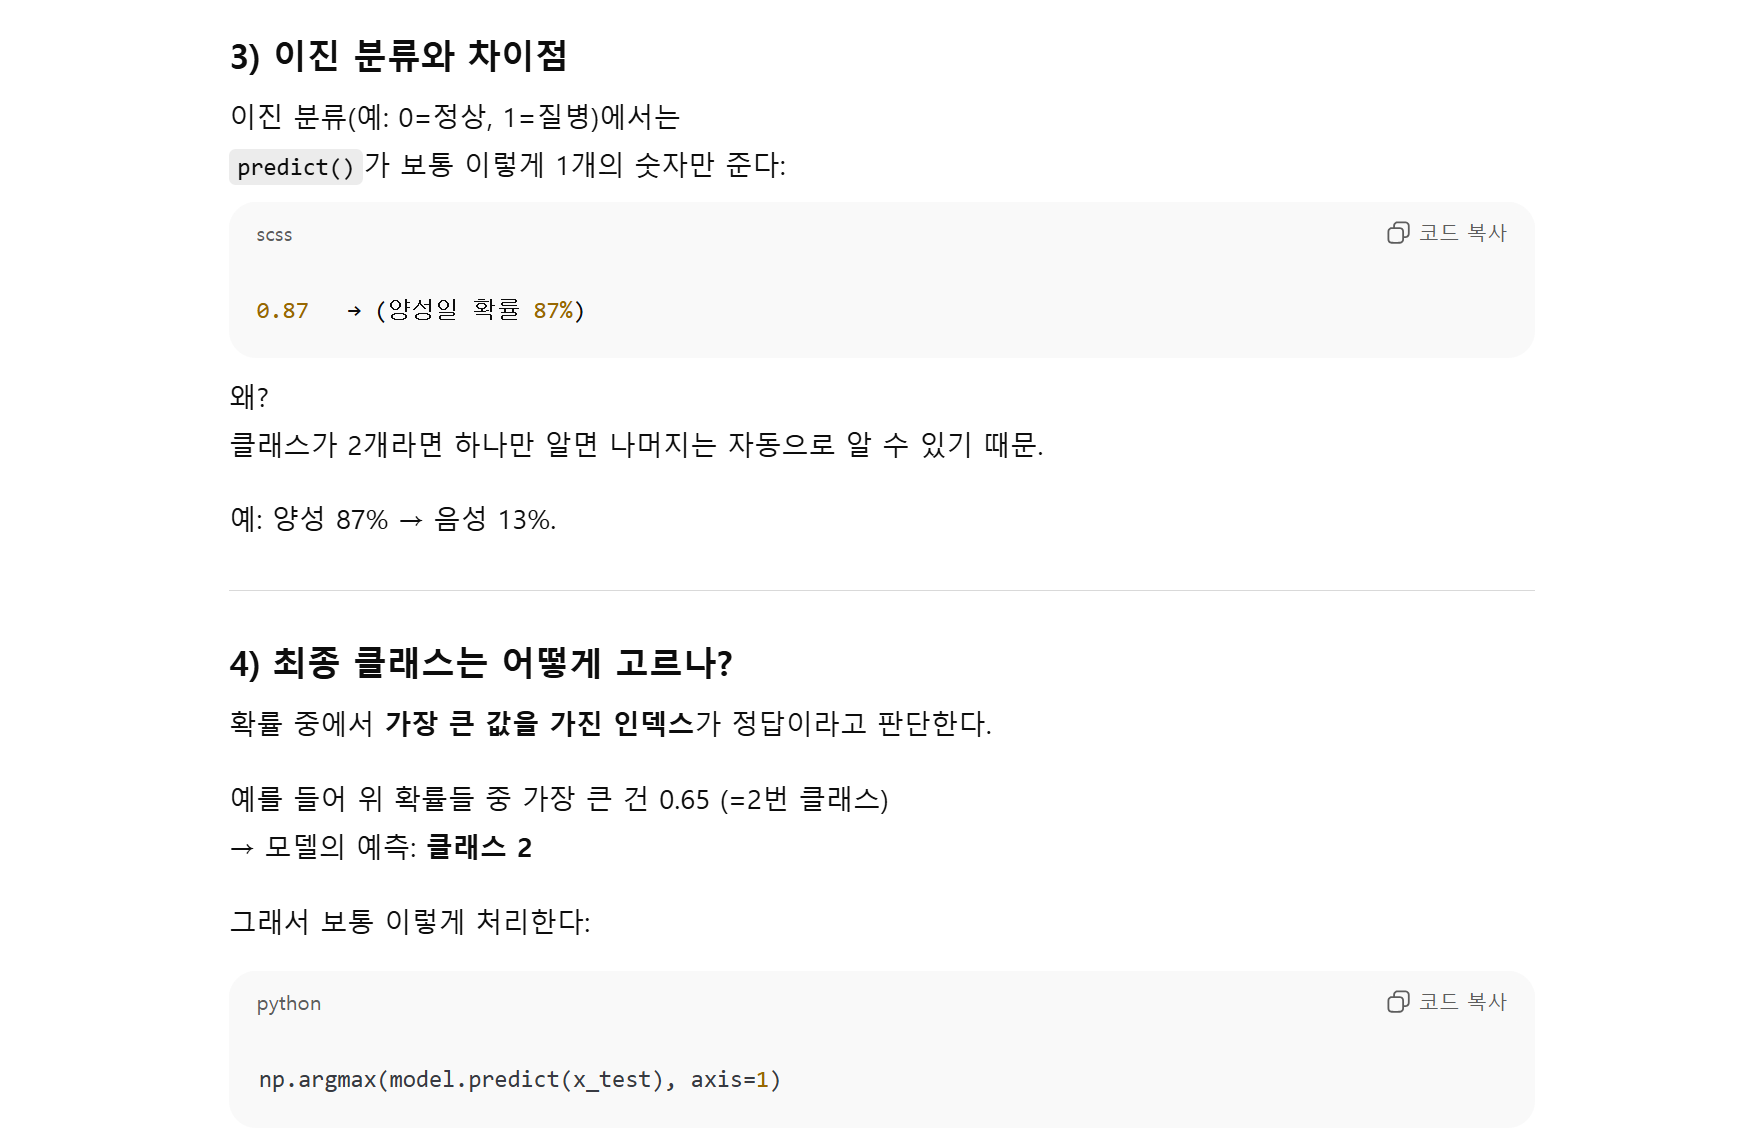
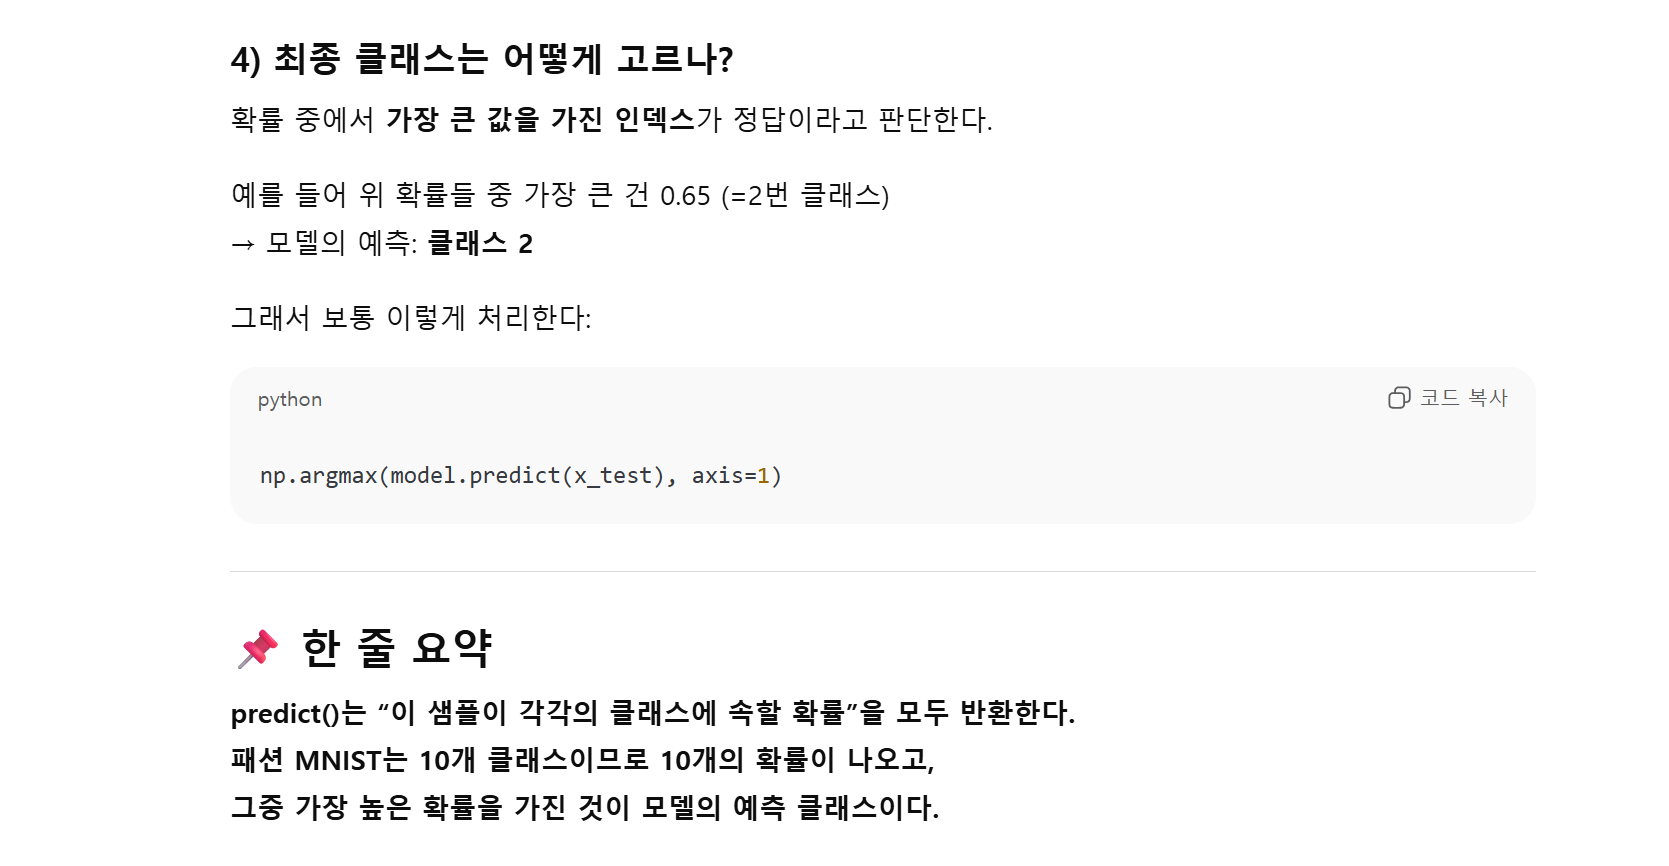

In [32]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
0.882


`argmax()` = predict() 메서드 결과에서 가장 큰 값을 고르기 위해     
- 배열에서 가장 큰 값의 인덱스를 반환       
- 배열의 첫 번째 원소가 가장 큰 값일 경우 0을 반환      

`axis = -1` 은 배열의 마지막 차원을 따라 최댓값을 고름      
검증 세트는 2차원이기 때문에 마지막 차원은 1차원

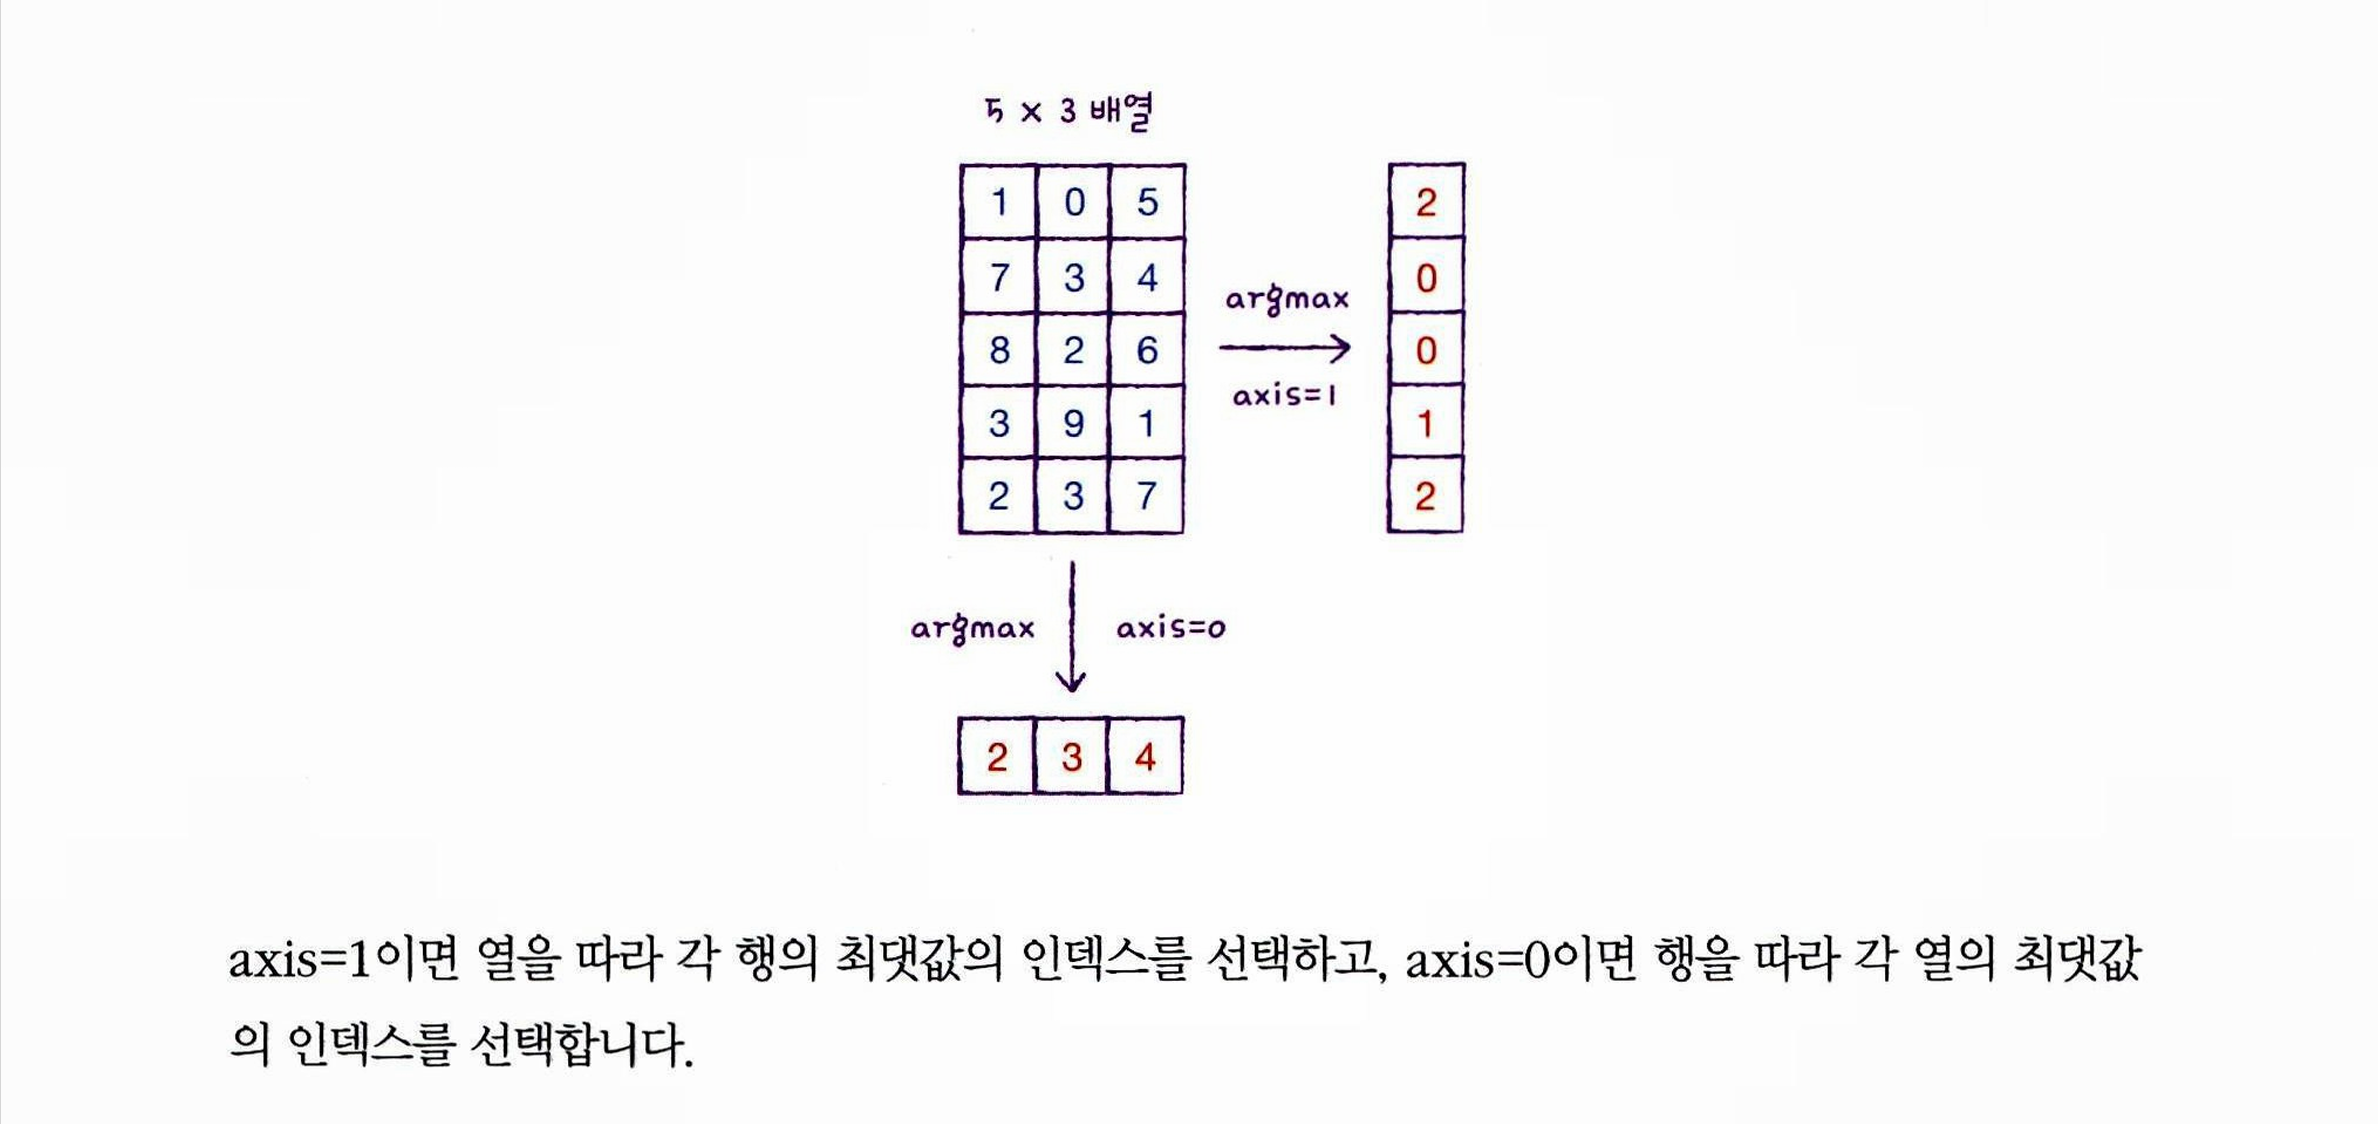


`print(np.mean(val_labels == val_target))`      
- argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교  
- 두 배열에서 각 위치의 값이 같으면 1, 다르면 0     
- 이를 평균하면 정확도      

In [33]:
#방법 2
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8830 - loss: 0.3416


[0.345289945602417, 0.8820000290870667]

## 5. 콜백

훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체, `keras.callbacks` 패키지 아래 있는 클래스들      

`ModelCheckpoint` 콜백은 에포크마다 모델을 저장     
`save_best_only=True` 매개변수를 지정하면 가장 낮은 검증 손실을 만드는 모델을 저장할 수 잇음

In [34]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [35]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8883 - loss: 0.3118


[0.31791964173316956, 0.8853333592414856]

modelcheckpoint callback이 가장 낮은 검증 손실 모델을 자동으로 저장해주나,      
20번 에포크 동안 훈련을 함      
과대적합이 시작되기 전에 훈련을 미리 중지하는 것 = **조기 종료 early stopping**     

### Early stopping callback

`patience` 매개 변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정        
`patience=2` 로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련 중지       
`restore_best_weights` 를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림   


`EarlyStopping` 콜백을 `ModelCheckpoint` 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고, 검증 손실이 다시 상승할 때 훈련을 중지할 수 있음        
또한, 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌림        

In [36]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=11, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


In [ ]:
#몇 번째 에포크에서 훈련이 중지되었는지 확인
print(early_stopping_cb.stopped_epoch) #9 니까 10번째

9


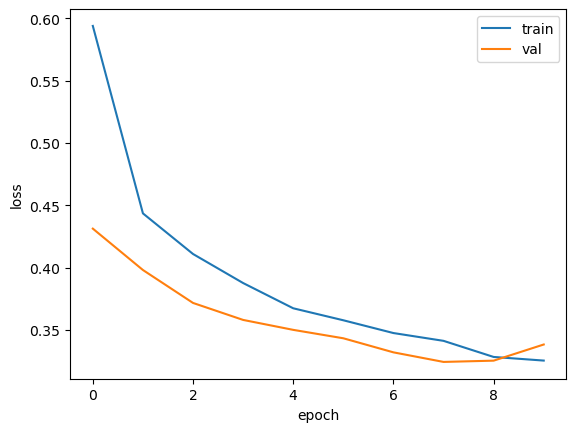

In [38]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [39]:
#조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능 확인
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8815 - loss: 0.3223


[0.32433727383613586, 0.8808333277702332]

• **드롭아웃**은 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법입니다.      
드롭아웃은 훈련 중에 적용되며 평가나 예측에서는 적용하지 않습니다.      
케라스는 이를 자동으로 처리합니다.      

 • **콜백**은 케라스 모델을 훈련하는 도중에 어떤 작업을 수행할 수 있도록 도와주는 도구입니다.       
대표적으로 최상의 모델을 자동으로 저장해 주거나 검증 점수가 더 이상 향상되지 않으면 일찍 종료할 수 있습니다.        
 • **조기 종료**는 검증 점수가 더 이상 감소하지 않고 상승하여 과대적합이 일어나면 훈련을 계속 진행하지 않고 멈추는 기법입니다.      
 이렇게 하면 계산 비용과 시간을 절약할 수 있습니다.

### Keras
• `Dropout`은 드롭아웃층입니다.        
첫 번째 매개변수로 드롭아웃 할 비율(r)을 지정합니다.        
드롭아웃 하지 않는 뉴런의 출력은 1/(1 - r)만큼 증가시켜 출력의 총합이 같도록 만듭니다. 


• `save_weights()`는 모든 층의 가중치와 절편을 파일에 저장합니다.      
첫 번째 매개변수에 저장할 파일을 지정합니다.        
 savejormat 매개변수에서 저장할 파일 포맷을 지정합니다.         
 기본적으로 HDF5 포맷으로 가중치와 절편을 저장합니다.       
  파일 이름은 반드시 '.weights.h5’로 끝나야 합니다.      


• `load_weights()`는 모든 층의 가중치와 절편을 파일에 읽습니다.      
첫 번째 매개변수에 읽을 파일을 지정합니다.      

• `save()`는 모델 구조와 모든 가중치와 절편을 파일에 저장합니다.        
첫 번째 매개변수에 저장할 파일을 지정합니다.        
 savejormat 매개변수에서 저장할 파일 포맷을 지정합니다.     
  기본적으로 케라스 3.x 포맷으로 저장하며 파일 이름은 ‘.keras’로 끝나야 합니다.     


 • `load_model ()`은 model.save () 로 저장된 모델을 로드합니다.       
첫 번째 매개변수에 읽을 파일을 지정합니다.      


 • `ModelCheckpoint`는 케라스 모델과 가중치를 일정 간격으로 저장합니다.         
첫 번째 매개변수에 저장할 파일을 지정합니다.        
 `monitor` 매개변수는 모니터링할 지표를 지정합니다. 기본값은 ‘val_loss’로 검증 손실을 관 
찰합니다.       
 `save_weights_only` 매개변수의 기본값은 False로 전체 모델을 저장합니다. True로 지정 
하면 모델의 가중치와 절편만 저장합니다.     
 `save_best_only` 매개변수를 True로 지정하면 가장 낮은 검증 점수를 만드는 모델을 저장합 
니다.       


 • `EarlyStopping`은 관심 지표가 더이상 향상하지 않으면 훈련을 중지합니다.      
` monitor` 매개변수는 모니터링할 지표를 지정합니다. 기본값은 ‘val_loss’로 검증 손실을 관 
찰합니다.               
 `patience `매개변수에 모델이 더 이상 향상되지 않고 지속할 수 있는 최대 에포크 횟수를 지정 
합니다.     
 `restore_best_weights` 매개변수에 최상의 모델 가중치를 복원할지 지정합니다. 기본값은 
False 입니다        